<a href="https://colab.research.google.com/github/udita1903/NLP/blob/main/Sentiment%20Analysis/IMDB%20Movie%20Reviews/IMDB_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy


In [22]:
#plain reviews datasets
text,info=tfds.load("imdb_reviews",with_info=True,as_supervised=True)
#subword reviews
subword_text,subword_info=tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)

In [23]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
    

In [24]:
print(info.features)

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})


In [25]:
print(len(info.features))

2


In [26]:
print(subword_info.features)

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})


In [27]:
# Take 2 training examples and print the text feature
for example in text['train'].take(2):
  print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [28]:
for i in subword_text['train'].take(2):
  print(i)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [29]:
#to get the tokenizer you will use the encoder
#subwords dataset is already tokenized, use encoder to get the text data
tokenizer_subword=subword_info.features['text'].encoder
for i in subword_text['train'].take(2):
  print(tokenizer_subword.decode(i[0])) #i[0] is the text,i[1] is the sentiment

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [30]:
#subword encoding
training=text['train']#contains both sentences and labels
train_sentences=[]

for s,l in training:
  train_sentences.append(s.numpy().decode('utf8'))

In [31]:
vocab_size=10000
oov_tok='<oov>'

tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
sequences=tokenizer.texts_to_sequences(train_sentences)

In [32]:
print(len(tokenizer.word_index))


88583


In [33]:
print(subword_info)


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    

In [34]:
print(tokenizer_subword)

<SubwordTextEncoder vocab_size=8185>


In [35]:
print(tokenizer_subword.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [36]:
#print some of the sequences
print(tokenizer.sequences_to_texts(sequences[0:1]))
print(sequences[0])
print(len(tokenizer.sequences_to_texts(sequences[0:1])[0].split()))
print(len(sequences[0]))

["this was an absolutely terrible movie don't be <oov> in by christopher walken or michael <oov> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <oov> rebels were making their cases for <oov> maria <oov> <oov> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <oov> good name i could barely sit through it"]
[12, 14, 33, 425, 392, 18, 90, 28, 1, 9, 32, 1366, 3585, 40, 486, 1, 197, 24, 85, 154, 19, 12, 213, 329, 28, 66, 247, 215, 9, 477, 58, 66, 85, 114, 98, 22, 5675, 12, 1322, 643, 767, 12, 18, 7, 33, 400, 8170, 176, 2455, 416, 2, 89, 1231, 137, 69, 146, 52, 2, 1, 7577, 69, 229, 66, 2933, 16, 1, 2904, 1, 1, 1479, 4940, 3

The error you are encountering (TypeError: 'int' object is not iterable) is because the sequences_to_texts method expects a list of sequences, not an individual sequence. When you provide sequences[0], it's an individual sequence, not a list of sequences.

In [37]:
print(len(tokenizer.word_index))
print(len(tokenizer_subword.subwords))

88583
7928


Encoding the plain text using the subword encoder

In [38]:
tokenized_string=tokenizer_subword.encode(train_sentences[0])
print(tokenized_string)
print(tokenizer_subword.decode(tokenized_string))

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re

Comparing the performance of a normal tokenizer and a subword tokenizer on the plain texts

In [39]:
sample="My name is udita and I am learning TensorFlow"
sequence=tokenizer.texts_to_sequences([sample])#you need to pass a list
print(sequence)
print(tokenizer.sequences_to_texts(sequence))

#using the subword tokenizer
seq=tokenizer_subword.encode(sample)
print(seq)
decoded=tokenizer_subword.decode(seq)
print(decoded)


[[59, 401, 7, 1, 3, 11, 242, 2798, 1]]
['my name is <oov> and i am learning <oov>']
[387, 769, 9, 1484, 2684, 7961, 5, 12, 258, 5635, 34, 6307, 2327, 4043, 2120]
My name is udita and I am learning TensorFlow


In [40]:
#Mapping for the subword tokenizer

for i in seq:
  print("{}-------->{}".format(i,tokenizer_subword.decode([i])))

387-------->My 
769-------->name 
9-------->is 
1484-------->ud
2684-------->ita
7961--------> 
5-------->and 
12-------->I 
258-------->am 
5635-------->learn
34-------->ing 
6307-------->Ten
2327-------->sor
4043-------->Fl
2120-------->ow


# Train the model using the pre tokenized dataset.
### Comparing the performance of the model for various architectures


In [41]:
buffer_size=10000
batch_size=64
train_data,test_data=subword_text['train'],subword_text['test']
train_data=train_data.shuffle(buffer_size)
train_data=train_data.padded_batch(batch_size)
test_data=test_data.padded_batch(batch_size)

In [42]:
embedding_dim=64

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subword.vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [43]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_10 (Dense)            (None, 6)                 390       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 524237 (2.00 MB)
Trainable params: 524237 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [44]:
epochs = 10


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


history = model.fit(train_data, epochs=epochs, validation_data=test_data)

Epoch 1/10
391/391 [==============================] - 85s 201ms/step - loss: 0.6932 - accuracy: 0.4956 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 53s 136ms/step - loss: 0.6842 - accuracy: 0.5572 - val_loss: 0.6493 - val_accuracy: 0.6674
Epoch 3/10
391/391 [==============================] - 39s 99ms/step - loss: 0.5714 - accuracy: 0.7670 - val_loss: 0.5087 - val_accuracy: 0.8091
Epoch 4/10
391/391 [==============================] - 24s 62ms/step - loss: 0.4410 - accuracy: 0.8587 - val_loss: 0.4257 - val_accuracy: 0.8343
Epoch 5/10
391/391 [==============================] - 23s 59ms/step - loss: 0.3552 - accuracy: 0.8942 - val_loss: 0.3706 - val_accuracy: 0.8732
Epoch 6/10
391/391 [==============================] - 20s 51ms/step - loss: 0.3042 - accuracy: 0.9078 - val_loss: 0.3467 - val_accuracy: 0.8749
Epoch 7/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2691 - accuracy: 0.9174 - val_loss: 0.3361 - val_accurac

In [45]:
import matplotlib.pyplot as plt

def graph(model):
  plt.figure(figsize=(30,10))
  plt.subplot(1,3,1)
  plt.plot(model.history['loss'])
  plt.plot(model.history['accuracy'])
  plt.legend(['loss','accuracy'])
  plt.xlabel("EPOCHS")

  plt.subplot(1,3,2)
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.legend(['accuracy','val_accuracy'])
  plt.xlabel('EPOCHS')

  plt.subplot(1,3,3)
  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.legend(['loss','val_loss'])
  plt.xlabel('EPOCHS')


# Building the model using the plain text dataset

## Preparing the model


In [46]:
training_sentence=[]
training_label=[]
testing_sentence=[]
testing_label=[]

for s,l in text['train']:
  training_sentence.append(s.numpy().decode('utf8'))
  training_label.append(l.numpy())
for s,l in text['test']:
  testing_sentence.append(s.numpy().decode('utf8'))
  testing_label.append(l.numpy())

In [47]:
#turning the label lists into numpy arrays
import numpy as np
training_label=np.array(training_label)
testing_label=np.array(testing_label)


## Creating the tokenizer and building vocabulary


### Hyperparameters

In [48]:
vocab_length=10000
oov_token="<oov>"
max_len=120

In [49]:
tokenizer=Tokenizer(num_words=vocab_length,oov_token=oov_token)
tokenizer.fit_on_texts(training_sentence)
word_index=tokenizer.word_index
train_sequences=tokenizer.texts_to_sequences(training_sentence)
train_padded=pad_sequences(train_sequences,maxlen=max_len,padding='post',truncating='post')

#generating and padding test sequences
test_sequences=tokenizer.texts_to_sequences(testing_sentence)
test_padded=pad_sequences(test_sequences,maxlen=max_len,padding='post',truncating='post')

## Model 1- Using Flatten


In [50]:
embedding_dim = 16
dense_dim = 6

model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_flatten.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_12 (Dense)            (None, 6)                 11526     
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_flatten = model_flatten.fit(train_padded, training_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(test_padded, testing_label))

Epoch 1/10
196/196 [==============================] - 28s 138ms/step - loss: 0.6554 - accuracy: 0.5978 - val_loss: 0.5577 - val_accuracy: 0.7698
Epoch 2/10
196/196 [==============================] - 14s 70ms/step - loss: 0.4680 - accuracy: 0.8521 - val_loss: 0.4836 - val_accuracy: 0.8250
Epoch 3/10
196/196 [==============================] - 10s 51ms/step - loss: 0.3455 - accuracy: 0.9242 - val_loss: 0.4762 - val_accuracy: 0.8204
Epoch 4/10
196/196 [==============================] - 6s 28ms/step - loss: 0.2550 - accuracy: 0.9663 - val_loss: 0.4932 - val_accuracy: 0.8148
Epoch 5/10
196/196 [==============================] - 4s 20ms/step - loss: 0.2001 - accuracy: 0.9820 - val_loss: 0.5301 - val_accuracy: 0.8114
Epoch 6/10
196/196 [==============================] - 2s 9ms/step - loss: 0.1672 - accuracy: 0.9864 - val_loss: 0.5498 - val_accuracy: 0.8099
Epoch 7/10
196/196 [==============================] - 3s 14ms/step - loss: 0.1448 - accuracy: 0.9882 - val_loss: 0.5575 - val_accuracy: 0.8

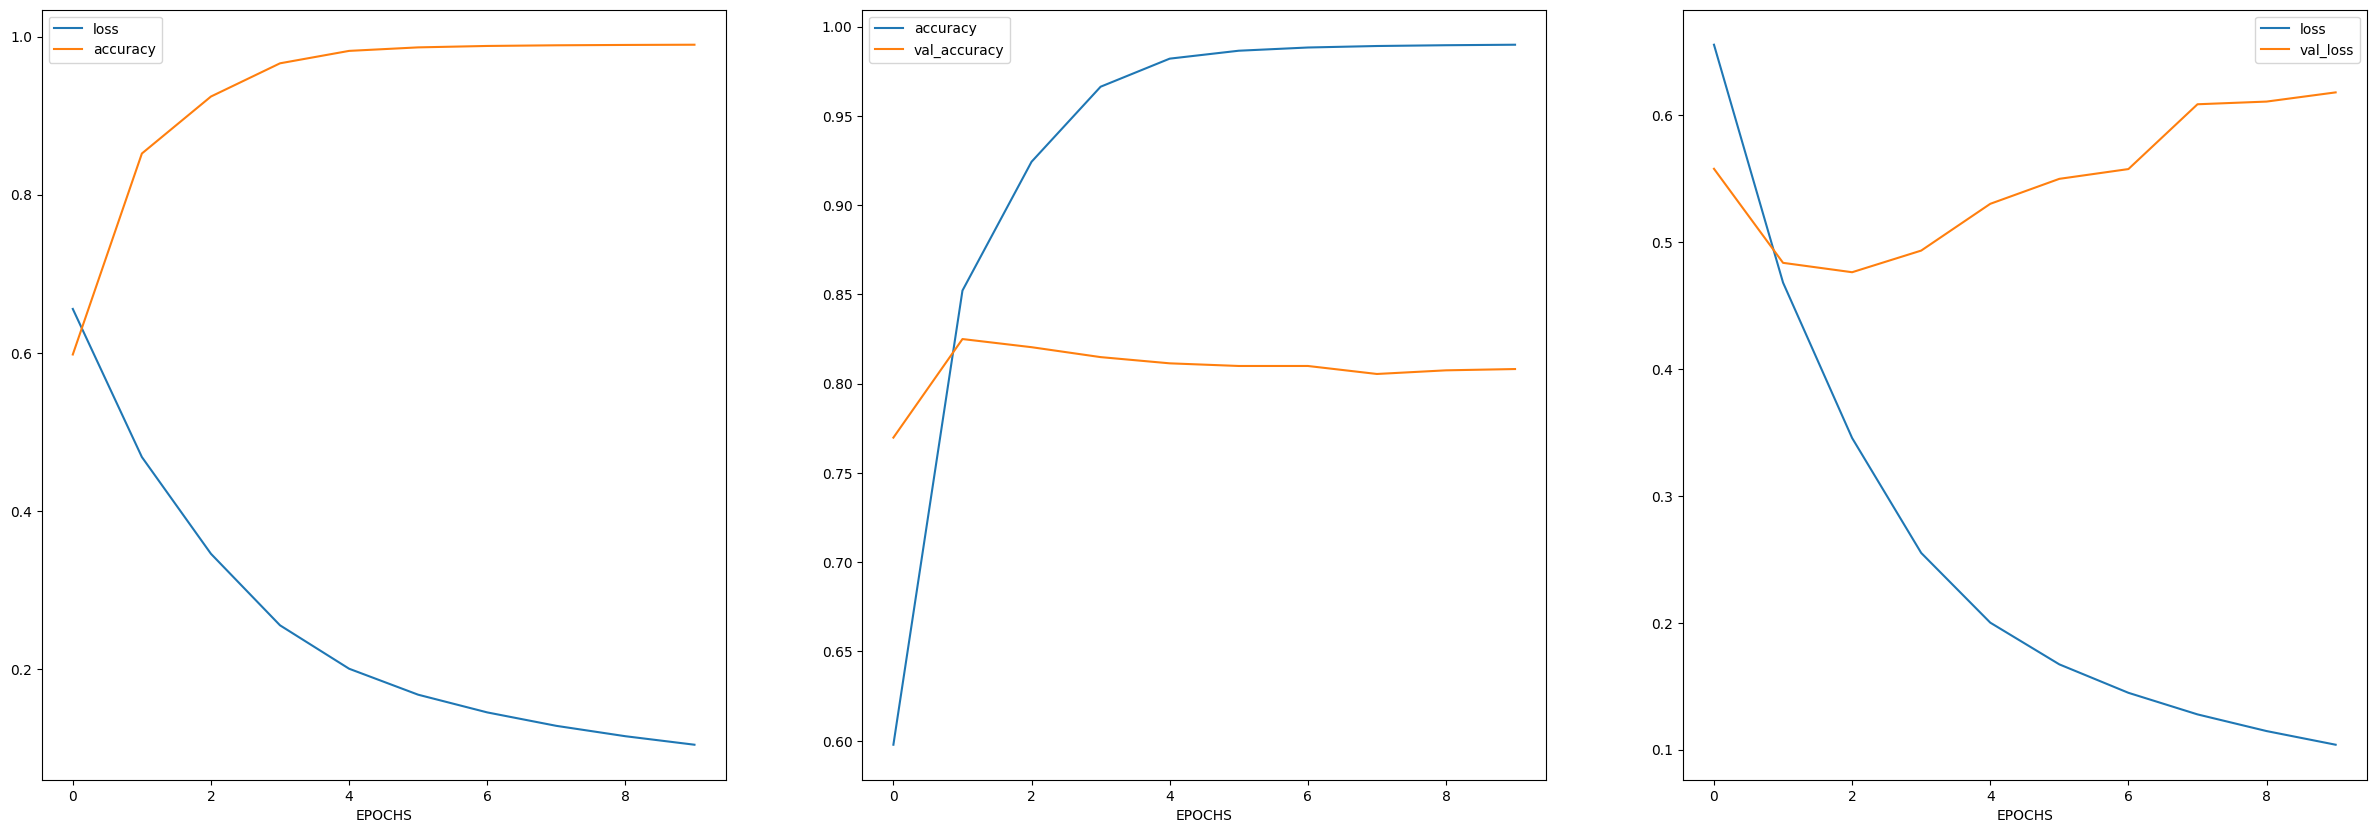

In [52]:
graph(history_flatten)

## Model 2-LSTM

In [53]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 6)                 390       
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 172941 (675.55 KB)
Trainable params: 172941 (675.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
history_lstm = model_lstm.fit(train_padded, training_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(test_padded, testing_label))


Epoch 1/10
196/196 [==============================] - 28s 120ms/step - loss: 0.5673 - accuracy: 0.7012 - val_loss: 0.4436 - val_accuracy: 0.7881
Epoch 2/10
196/196 [==============================] - 12s 61ms/step - loss: 0.3282 - accuracy: 0.8642 - val_loss: 0.4071 - val_accuracy: 0.8148
Epoch 3/10
196/196 [==============================] - 10s 50ms/step - loss: 0.2570 - accuracy: 0.9002 - val_loss: 0.4326 - val_accuracy: 0.8158
Epoch 4/10
196/196 [==============================] - 7s 34ms/step - loss: 0.2191 - accuracy: 0.9173 - val_loss: 0.4468 - val_accuracy: 0.8182
Epoch 5/10
196/196 [==============================] - 6s 31ms/step - loss: 0.1903 - accuracy: 0.9311 - val_loss: 0.4458 - val_accuracy: 0.8060
Epoch 6/10
196/196 [==============================] - 5s 25ms/step - loss: 0.1688 - accuracy: 0.9414 - val_loss: 0.5642 - val_accuracy: 0.8004
Epoch 7/10
196/196 [==============================] - 5s 26ms/step - loss: 0.1468 - accuracy: 0.9506 - val_loss: 0.5424 - val_accuracy: 0.

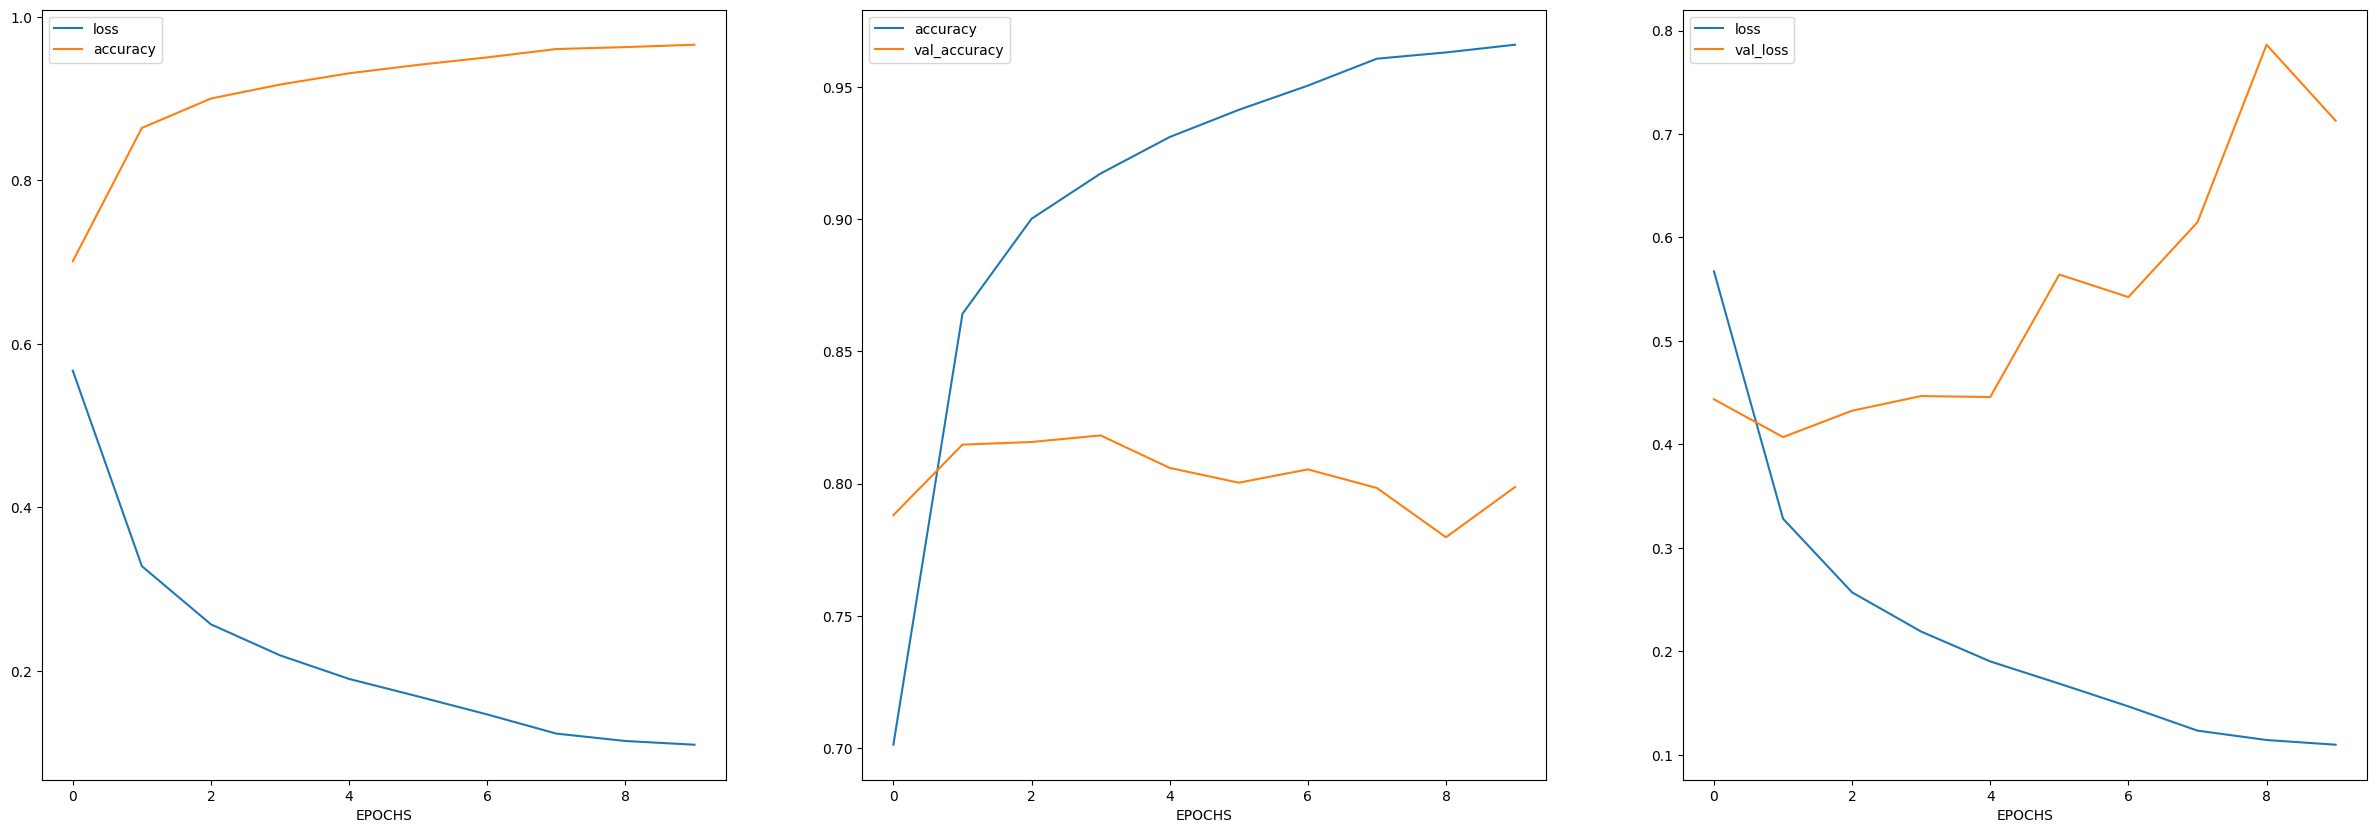

In [55]:
graph(history_lstm)

##Model 3- GRU

In [56]:
# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 6)                 390       
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169997 (664.05 KB)
Trainable params: 169997 (664.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(train_padded, training_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(test_padded, testing_label))

Epoch 1/10
196/196 [==============================] - 27s 117ms/step - loss: 0.5903 - accuracy: 0.6646 - val_loss: 0.4143 - val_accuracy: 0.8141
Epoch 2/10
196/196 [==============================] - 12s 63ms/step - loss: 0.3286 - accuracy: 0.8641 - val_loss: 0.4466 - val_accuracy: 0.7966
Epoch 3/10
196/196 [==============================] - 8s 39ms/step - loss: 0.2526 - accuracy: 0.9027 - val_loss: 0.4172 - val_accuracy: 0.8227
Epoch 4/10
196/196 [==============================] - 5s 28ms/step - loss: 0.2128 - accuracy: 0.9196 - val_loss: 0.4749 - val_accuracy: 0.8184
Epoch 5/10
196/196 [==============================] - 6s 31ms/step - loss: 0.1795 - accuracy: 0.9355 - val_loss: 0.4870 - val_accuracy: 0.8084
Epoch 6/10
196/196 [==============================] - 4s 23ms/step - loss: 0.1597 - accuracy: 0.9442 - val_loss: 0.5878 - val_accuracy: 0.7849
Epoch 7/10
196/196 [==============================] - 4s 21ms/step - loss: 0.1371 - accuracy: 0.9531 - val_loss: 0.5696 - val_accuracy: 0.7

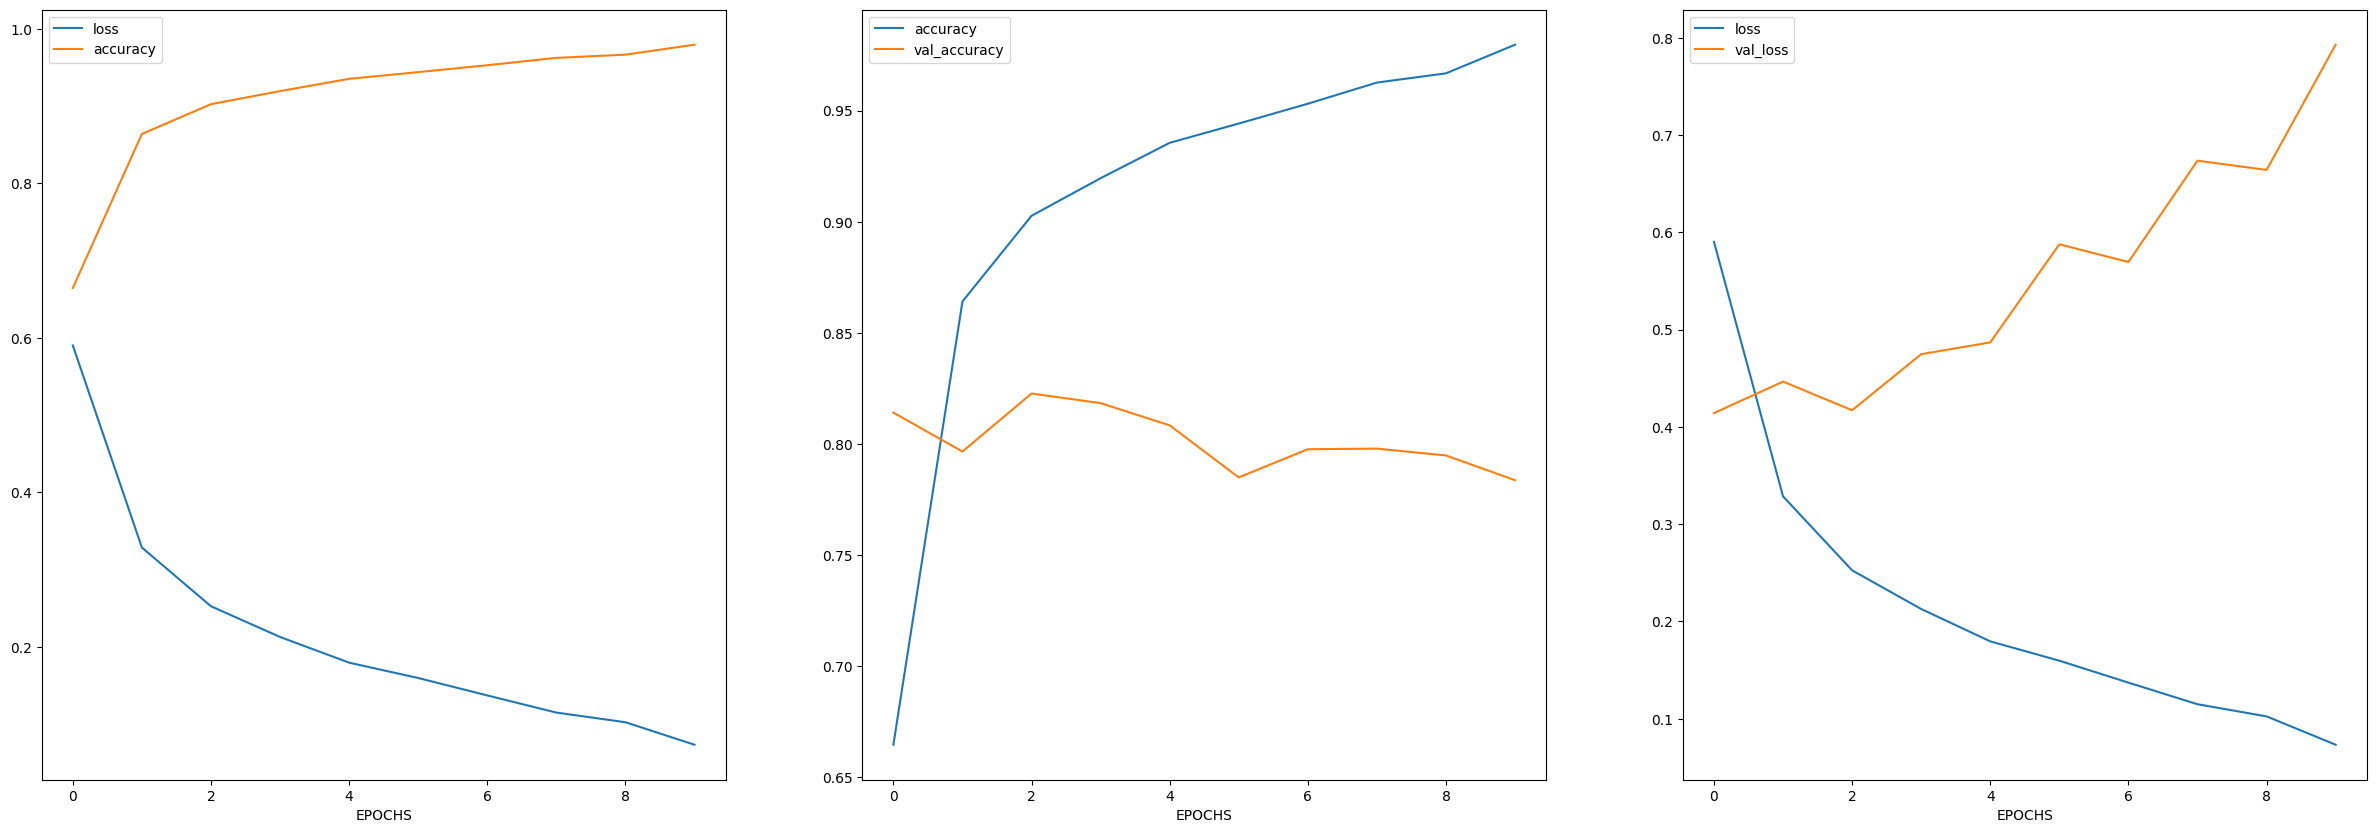

In [58]:
graph(history_gru)

## Model 4- Convolution

In [59]:
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d_2  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_18 (Dense)            (None, 6)                 774       
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [60]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(train_padded, training_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(test_padded, testing_label))


Epoch 1/10
196/196 [==============================] - 27s 105ms/step - loss: 0.5198 - accuracy: 0.7381 - val_loss: 0.3943 - val_accuracy: 0.8203
Epoch 2/10
196/196 [==============================] - 10s 50ms/step - loss: 0.2975 - accuracy: 0.8780 - val_loss: 0.3843 - val_accuracy: 0.8311
Epoch 3/10
196/196 [==============================] - 6s 33ms/step - loss: 0.2401 - accuracy: 0.9052 - val_loss: 0.4154 - val_accuracy: 0.8239
Epoch 4/10
196/196 [==============================] - 5s 26ms/step - loss: 0.2057 - accuracy: 0.9232 - val_loss: 0.4588 - val_accuracy: 0.8174
Epoch 5/10
196/196 [==============================] - 3s 17ms/step - loss: 0.1817 - accuracy: 0.9343 - val_loss: 0.4993 - val_accuracy: 0.8122
Epoch 6/10
196/196 [==============================] - 4s 21ms/step - loss: 0.1606 - accuracy: 0.9427 - val_loss: 0.5530 - val_accuracy: 0.8050
Epoch 7/10
196/196 [==============================] - 3s 14ms/step - loss: 0.1393 - accuracy: 0.9534 - val_loss: 0.6080 - val_accuracy: 0.8

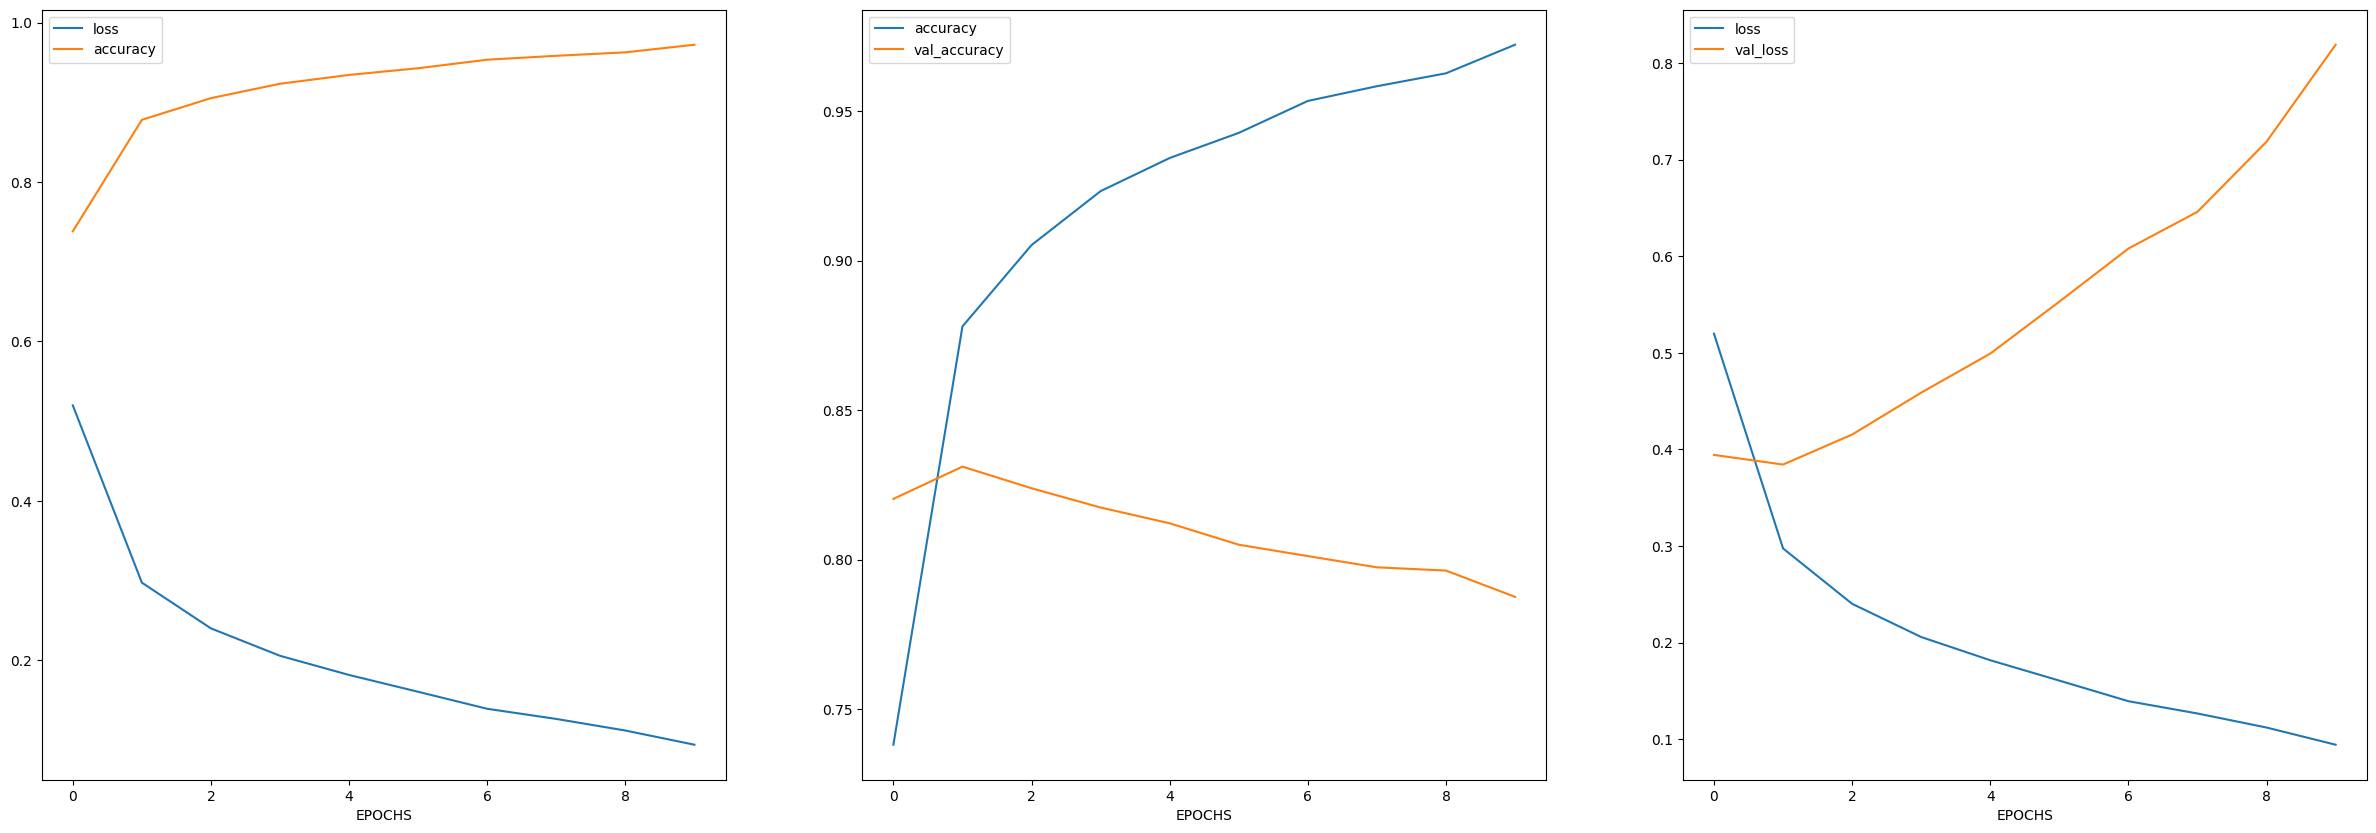

In [61]:
graph(history_conv)